In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

In [ ]:
# Asignar datos a un dataframe:
ruta = input("Ingresar la ruta del archivo House_Rent_Dataset.csv (sin comillas): ").strip()
df_train = pd.read_csv(ruta, sep = ",")
df_train.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [4]:
df_train.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [10]:
# Estadística descriptiva de la variable objetivo Rent (asumiendo que está en dólares)

df_train['Rent'].describe().apply("{0:.5f}".format)

count       4746.00000
mean       34993.45133
std        78106.41294
min         1200.00000
25%        10000.00000
50%        16000.00000
75%        33000.00000
max      3500000.00000
Name: Rent, dtype: object

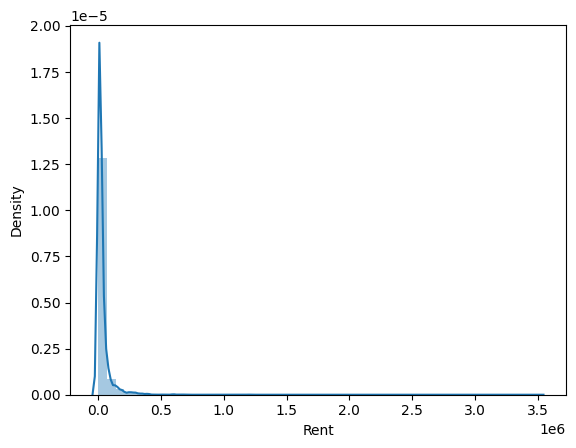

In [ ]:
#Histograma
#Se evidencia una distribucion sesgada a la derecha (sesgo positivo), con mayoría de valoes concentrados hacia el 0. 
#Cantidad significativa de outliers a la derecha indicando valores de renta muy altos
#Se podria aplicar una transformacion logaritmica para normalizarla 

sns.distplot(df_train['Rent']);

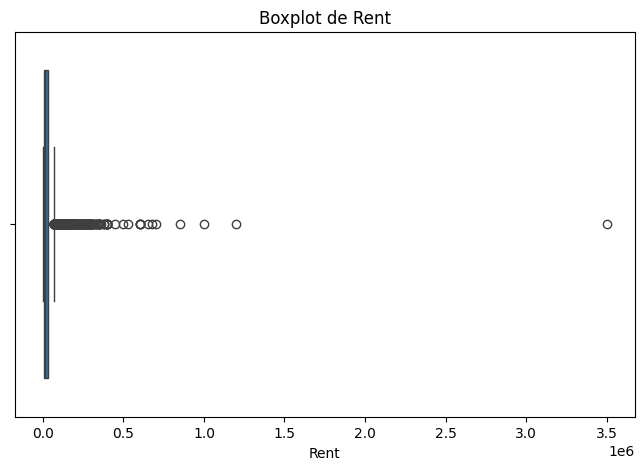

In [ ]:
# Visualizar Outliers
#existen alquileres extremadamente altos que podrían ser atípicos.

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train["Rent"])
plt.xlabel("Rent")
plt.title("Boxplot de Rent")
plt.show()

In [ ]:
# Asimetría y curtosis:
#Skewness mayor a 1 confirma distribucion sesgada
#Kurtosis mayor a 3 implica presencia de valores extremos

print("Skewness: %f" % df_train['Rent'].skew())
print("Kurtosis: %f" % df_train['Rent'].kurt())

Skewness: 21.409942
Kurtosis: 841.108067


In [9]:
Q1 = df_train["Rent"].quantile(0.25)
Q3 = df_train["Rent"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df_train[(df_train["Rent"] < limite_inferior) | (df_train["Rent"] > limite_superior)]
print("Número de outliers:", outliers.shape[0])


Número de outliers: 520


In [11]:
#Transformacion logaritmica ppara reducir sesgo
df_train["Rent_log"] = np.log1p(df_train["Rent"])

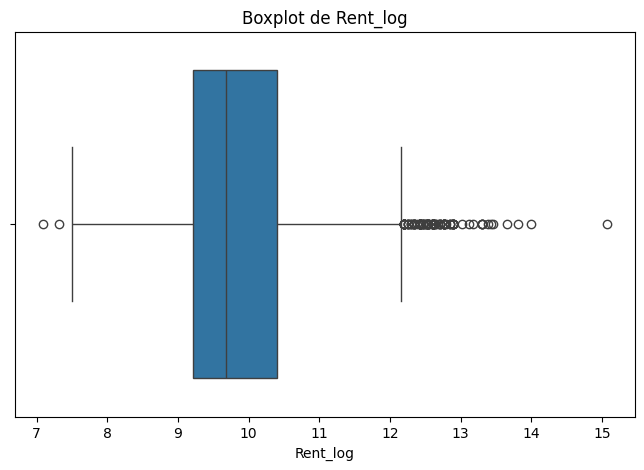

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train["Rent_log"])
plt.xlabel("Rent_log")
plt.title("Boxplot de Rent_log")
plt.show()

In [ ]:
# Estandarización de datos: convierte los valores de una variable a una escala común, con media = 0 y desviación estándar = 1
#Un valor de 0 significa que Rent es igual a la media.
#Un valor positivo indica que Rent está por encima de la media.
#Un valor negativo indica que Rent está por debajo de la media.



# Aplicar StandardScaler a la variable Rent
scaler = StandardScaler()
rent_scaled = scaler.fit_transform(df_train[['Rent']]) 

# Ordenar los valores escalados
sorted_rent = rent_scaled[:, 0].argsort()

# Seleccionar los valores más bajos y más altos
low_range = rent_scaled[sorted_rent][:10]   # 10 valores más bajos
high_range = rent_scaled[sorted_rent][-10:] # 10 valores más altos

# Imprimir los resultados
print('Fuera de la distribución (por debajo):')
print(low_range)
print('\nFuera de la distribución (por arriba):')
print(high_range)

Fuera de la distribución (por debajo):
[[-0.4327047 ]
 [-0.42886338]
 [-0.42502206]
 [-0.42246119]
 [-0.41990031]
 [-0.41990031]
 [-0.40965679]
 [-0.40965679]
 [-0.40965679]
 [-0.40965679]]

Fuera de la distribución (por arriba):
[[ 7.23456706]
 [ 7.23456706]
 [ 7.23456706]
 [ 7.87478682]
 [ 8.25891867]
 [ 8.51500657]
 [10.43566583]
 [12.35632509]
 [14.91720411]
 [44.36731276]]


Análisis Bivariado (Relación con otras variables)

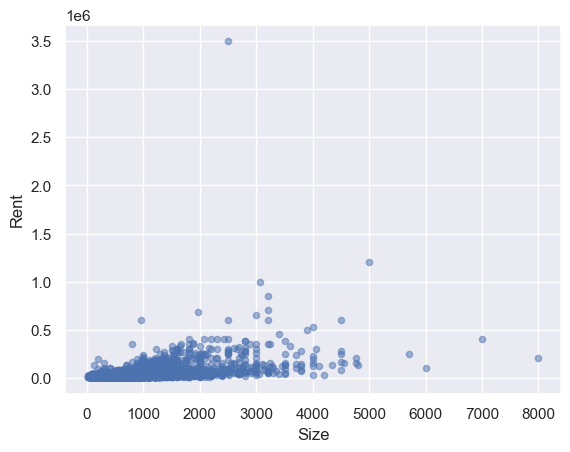

In [34]:
# Análisis bivariable SalePrice/GrLivArea:

var = 'Size'
data = pd.concat([df_train['Rent'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'Rent', alpha = 0.5);

In [39]:
# Encontrar el índice del valor más alejado (el mayor en valor absoluto)

scaler = StandardScaler()
df_train["rent_scaled"] = scaler.fit_transform(df_train[["Rent"]])
indice_outlier = df_train["rent_scaled"].abs().idxmax()

# Mostrar el valor más atípico antes de eliminarlo
print("Dato más alejado:")
print(df_train.loc[indice_outlier])

# Eliminar la fila con el outlier
df_clean = df_train.drop(index=indice_outlier)

# Verificar que se eliminó correctamente
print(f"\nNuevo tamaño del dataset: {df_clean.shape}")

Dato más alejado:
Posted On                2022-06-08
BHK                               3
Rent                        3500000
Size                           2500
Floor                    4 out of 4
Area Type               Carpet Area
Area Locality          Marathahalli
City                      Bangalore
Furnishing Status    Semi-Furnished
Tenant Preferred          Bachelors
Bathroom                          3
Point of Contact      Contact Agent
Rent_log                  15.068274
Rent_scaled               44.367313
rent_scaled               44.367313
Name: 1837, dtype: object

Nuevo tamaño del dataset: (4745, 15)


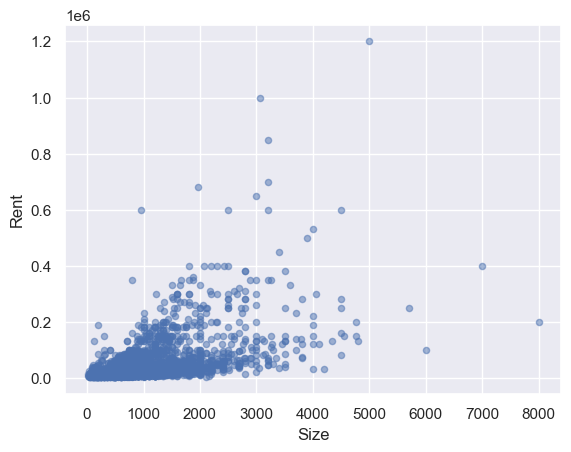

In [40]:
var = 'Size'
data = pd.concat([df_clean['Rent'], df_clean[var]], axis = 1)
data.plot.scatter(x = var, y = 'Rent', alpha = 0.5);

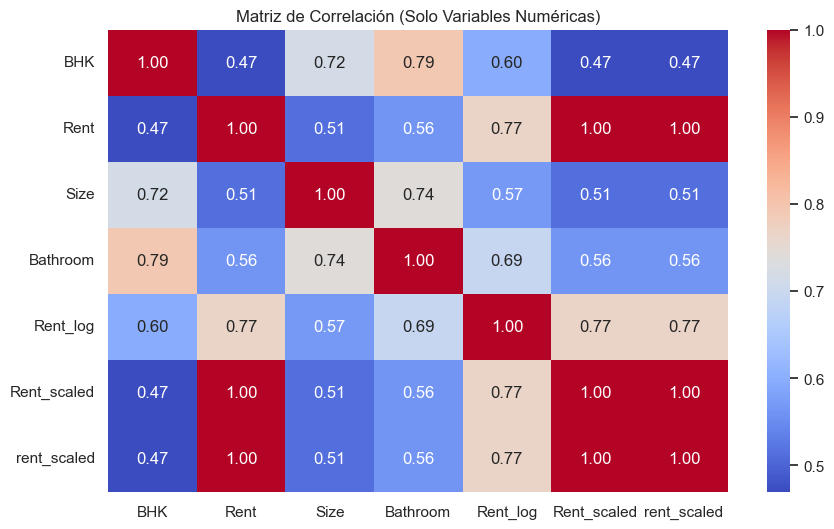

In [41]:
# Matriz de correlación:

# Seleccionar solo variables numéricas
df_numerico = df_clean.select_dtypes(include=["number"])

# Calcular la matriz de correlación
correlaciones = df_numerico.corr()

# Graficar el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación (Solo Variables Numéricas)")
plt.show()

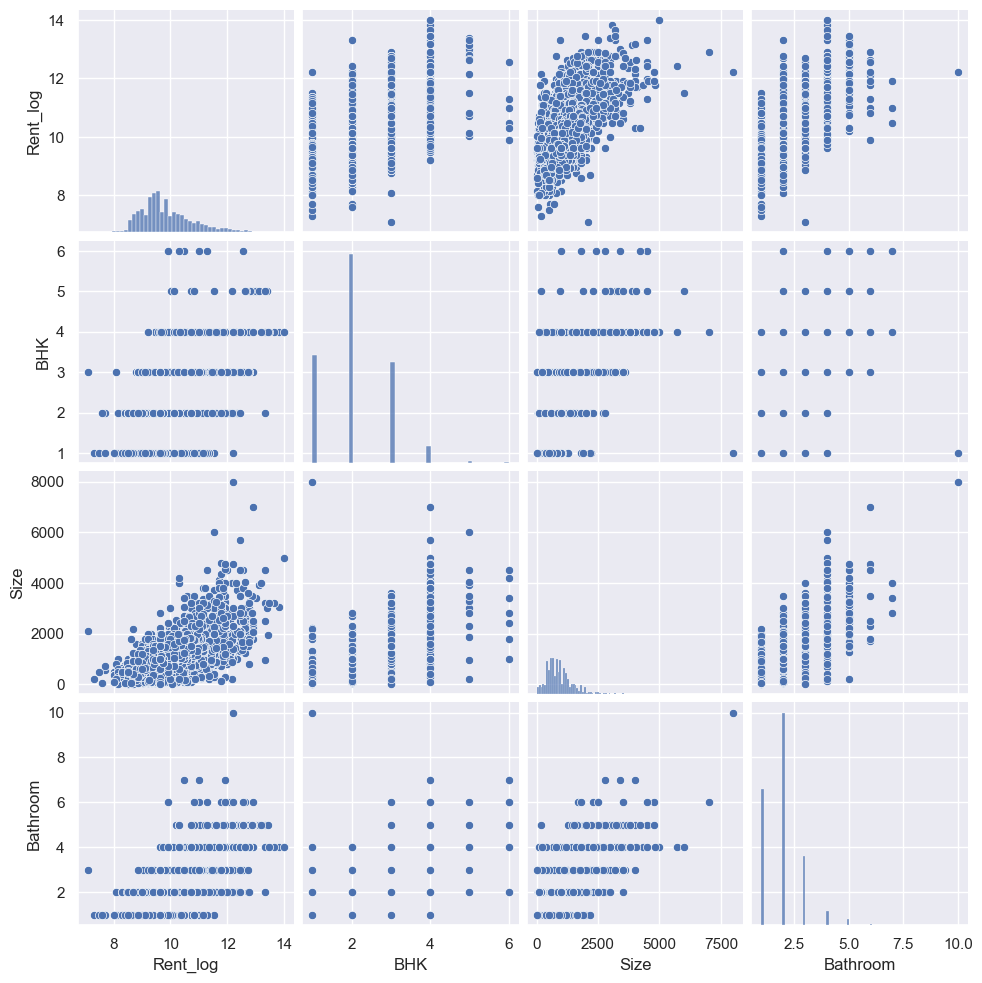

In [45]:
# Diagrama de dispersión con variables mas correlacionadas:
# Scatter plot:

sns.set()
cols = ['Rent_log', 'BHK', 'Size', 'Bathroom']
sns.pairplot(df_clean[cols], size = 2.5)
plt.show();

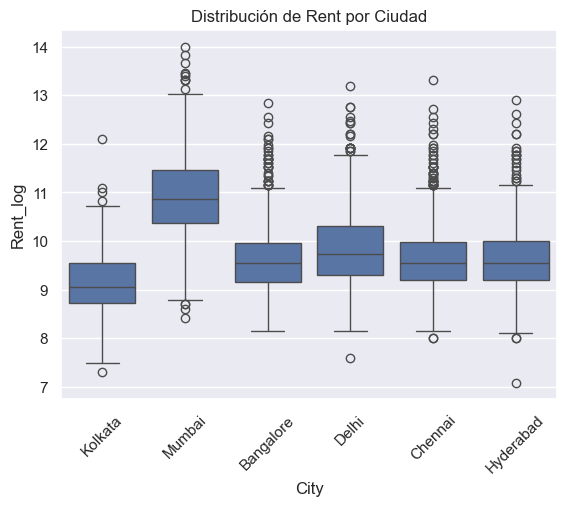

In [44]:
#Comparación con variables categóricas

sns.boxplot(x=df_clean["City"], y=df_clean["Rent_log"])
plt.xticks(rotation=45)
plt.title("Distribución de Rent por Ciudad")
plt.show()


Análisis de Datos Faltantes

In [46]:
# Missing data:

total = df_clean.isnull().sum().sort_values(ascending = False)
percent = (df_clean.isnull().sum() / df_clean.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Posted On,0,0.0
BHK,0,0.0
Rent,0,0.0
Size,0,0.0
Floor,0,0.0
Area Type,0,0.0
Area Locality,0,0.0
City,0,0.0
Furnishing Status,0,0.0
Tenant Preferred,0,0.0


Comprobación de normalidad

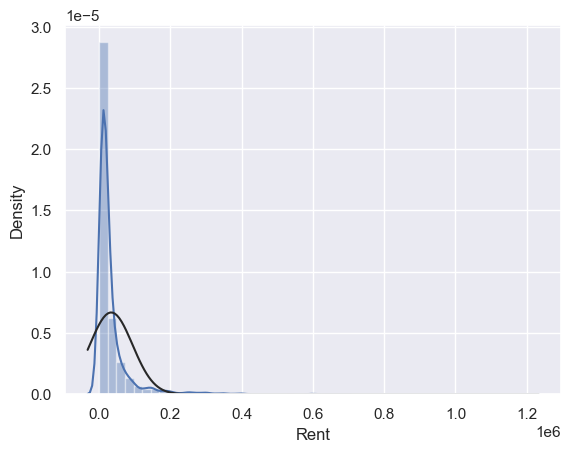

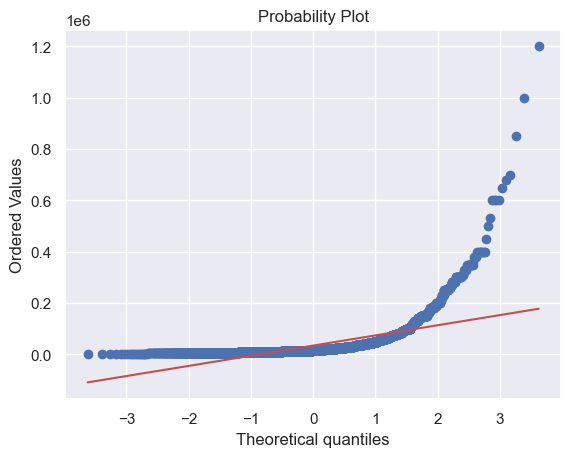

In [ ]:
# Histograma y gráfico de probabilidad normal:
#De estos gráficos se desprende que 'Rent' no conforma una distribución normal. 
#Muestra picos, asimetría positiva y no sigue la línea diagonal.

sns.distplot(df_clean['Rent'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_clean['Rent'], plot = plt)

In [48]:
# Transformación de los datos para normalidad

df_clean['Rent'] = np.log(df_clean['Rent'])

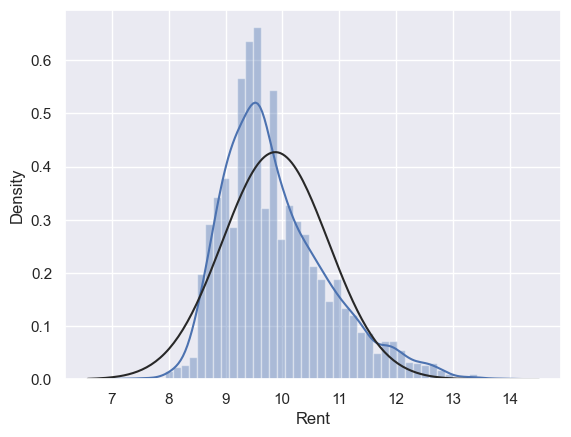

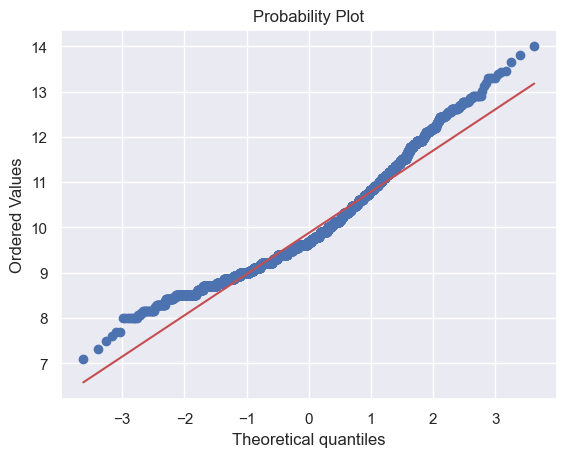

In [49]:
# Histograma y gráfico de probabilidad normal sobre los datos transformados:

sns.distplot(df_clean['Rent'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_clean['Rent'], plot = plt)

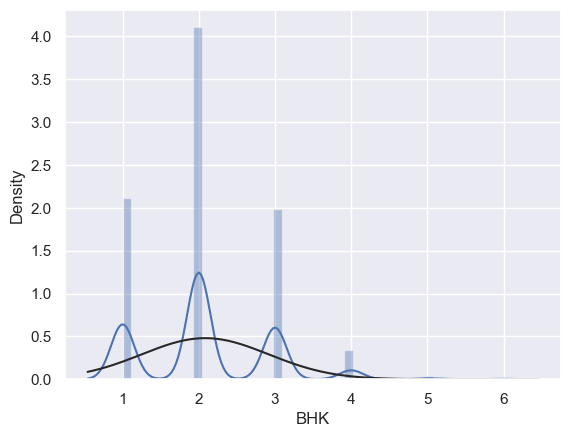

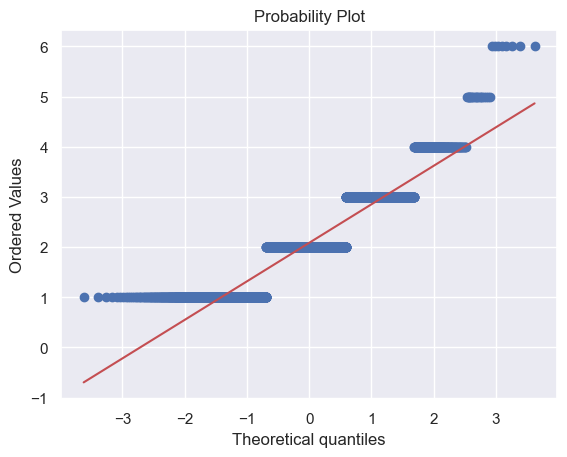

In [50]:
# Histograma y gráfico de probabilidad normal Para BHK:

sns.distplot(df_clean['BHK'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_clean['BHK'], plot = plt)

In [51]:
df_clean['BHK'] = np.log(df_clean['BHK'])

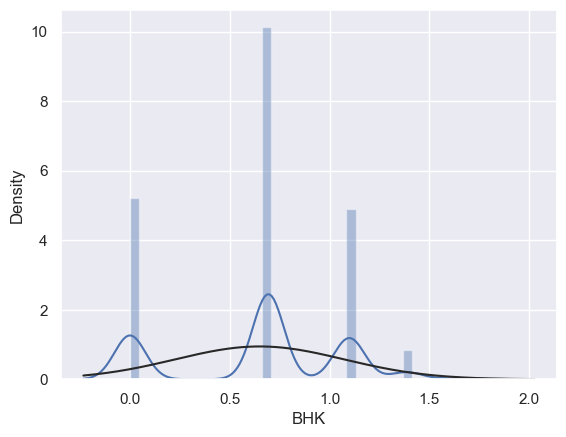

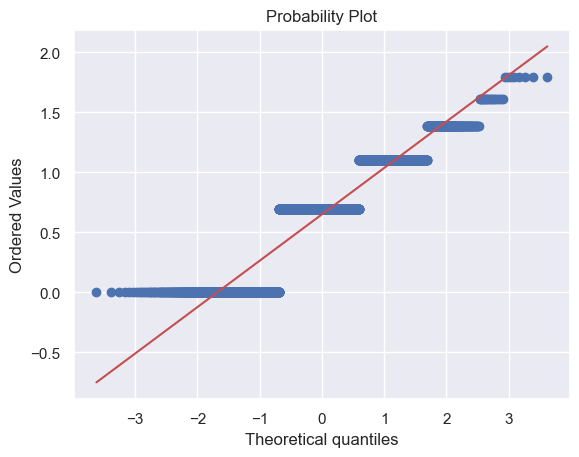

In [ ]:
sns.distplot(df_clean['BHK'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_clean['BHK'], plot = plt)

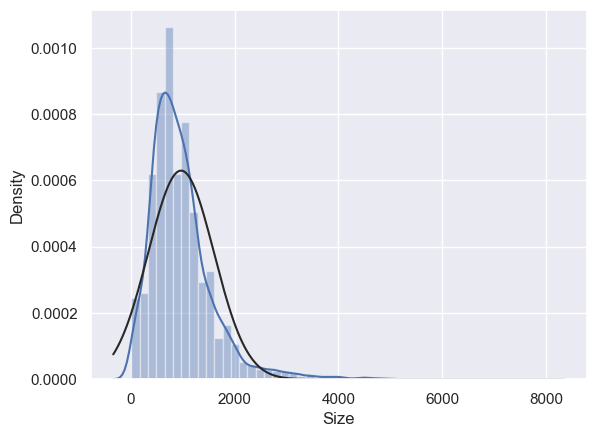

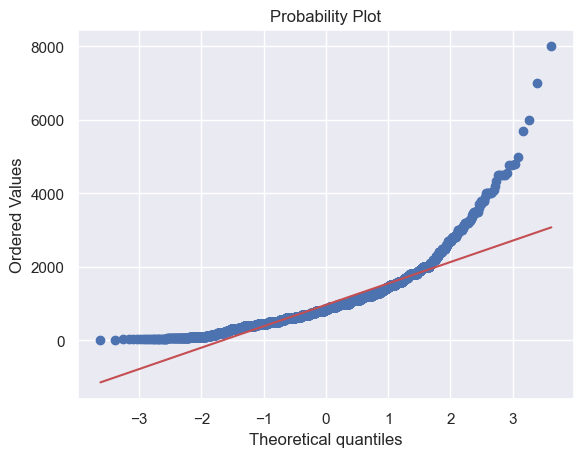

In [ ]:
#Histograma y gráfico de probabilidad normal Para Size:

sns.distplot(df_clean['Size'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_clean['Size'], plot = plt)

In [54]:
df_clean['Size'] = np.log(df_clean['Size'])

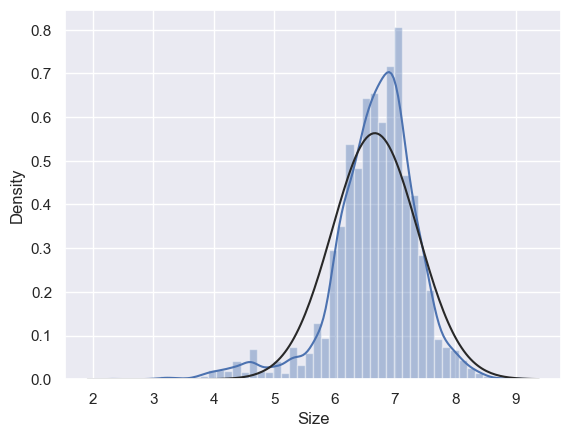

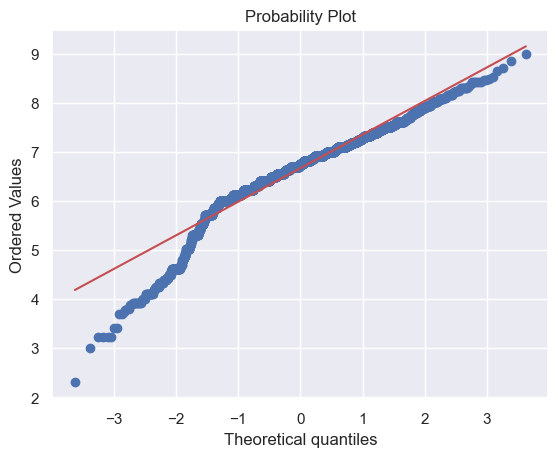

In [55]:
sns.distplot(df_clean['Size'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_clean['Size'], plot = plt)

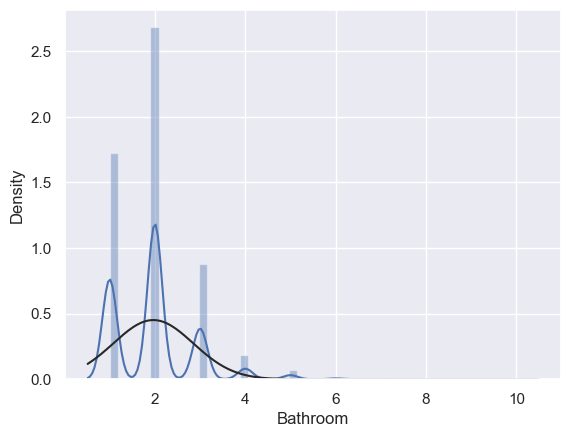

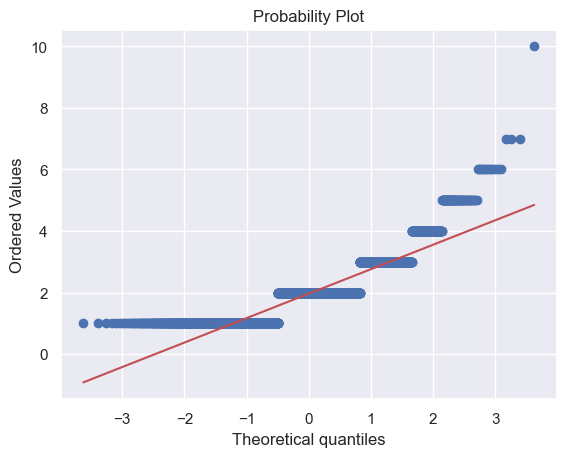

In [56]:
#Histograma y gráfico de probabilidad normal Para Bathroom:

sns.distplot(df_clean['Bathroom'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_clean['Bathroom'], plot = plt)

In [57]:
df_clean['Bathroom'] = np.log(df_clean['Bathroom'])

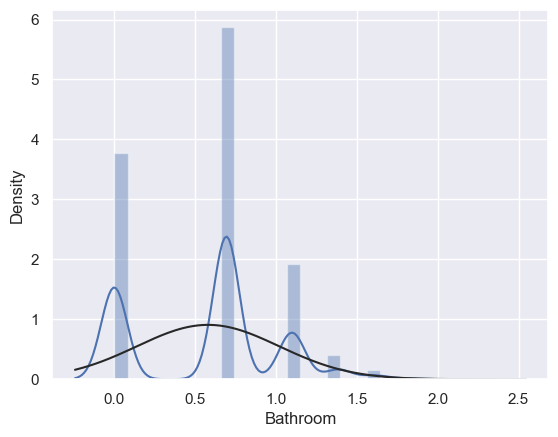

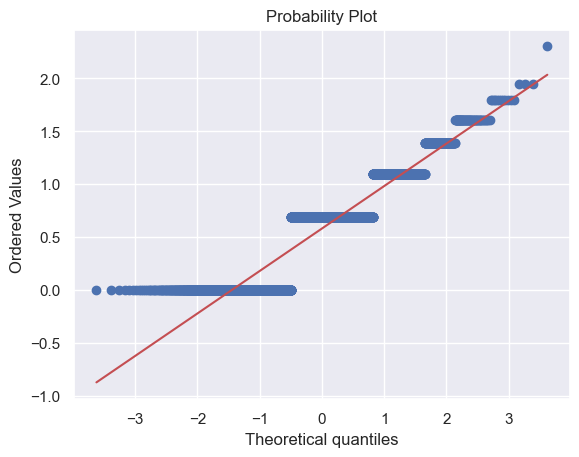

In [58]:
sns.distplot(df_clean['Bathroom'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_clean['Bathroom'], plot = plt)

In [ ]:
#Guardar como Pickle (Mejor para Pandas en Python)
#df = pd.read_pickle("df_final.pkl") 

df_clean.to_pickle("df_final.pkl")